In [33]:
# import all dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import classification_report

In [12]:
train = pd.read_csv('/content/train_data.txt', sep=':::', names = ['TITLE', 'GENRE', 'DESCRIPTION'], engine = 'python')
print(train.head())

                                TITLE       GENRE  \
1       Oscar et la dame rose (2009)       drama    
2                       Cupid (1997)    thriller    
3   Young, Wild and Wonderful (1980)       adult    
4              The Secret Sin (1915)       drama    
5             The Unrecovered (2007)       drama    

                                         DESCRIPTION  
1   Listening in to a conversation between his do...  
2   A brother and sister with a past incestuous r...  
3   As the bus empties the students for their fie...  
4   To help their unemployed father make ends mee...  
5   The film's title refers not only to the un-re...  


In [17]:
print(train.describe())

                                 TITLE    GENRE  \
count                            54214    54214   
unique                           54214       27   
top      Oscar et la dame rose (2009)    drama    
freq                                 1    13613   

                                              DESCRIPTION  
count                                               54214  
unique                                              54086  
top      Grammy - music award of the American academy ...  
freq                                                   12  


In [15]:
test = pd.read_csv('/content/test_data.txt', sep= ':::', names = ['TITLE', 'GENRE', 'DESCRIPTION'], engine = 'python')
print(test.head())

   TITLE                          GENRE  \
0      1          Edgar's Lunch (1998)    
1      2      La guerra de papá (1977)    
2      3   Off the Beaten Track (2010)    
3      4        Meu Amigo Hindu (2015)    
4      5             Er nu zhai (1955)    

                                         DESCRIPTION  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...  


In [16]:
print(test.describe())

              TITLE
count  54200.000000
mean   27100.500000
std    15646.336632
min        1.000000
25%    13550.750000
50%    27100.500000
75%    40650.250000
max    54200.000000


Checking NULL values

In [19]:
train.isnull().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [20]:
train.isna().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [21]:
test.isnull().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [22]:
test.isna().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [24]:
genre = train['GENRE'].value_counts()
print(genre)

GENRE
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64


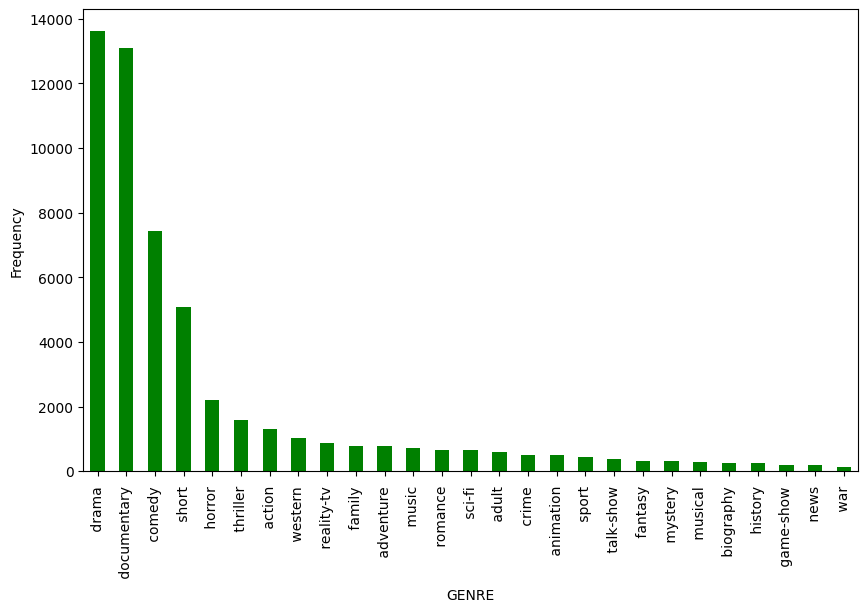

In [28]:
# Plotting Genre graph

plt.figure(figsize = (10,6))
genre.plot(kind = 'bar', color = 'green')
plt.ylabel('Frequency')
# plt.xticks(rotation = 0.75)
plt.show()

In [35]:
# Making Model and doing predictions
tfid = TfidfVectorizer(max_features= 5000)
x_train = tfid.fit_transform(train['DESCRIPTION'])
y_train = train['GENRE']

classifier = MultinomialNB()
classifier.fit(x_train, y_train)

y_predict = classifier.predict(x_train)
print('Classification report on training data: \n', classification_report(y_train, y_predict))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report on training data: 
                precision    recall  f1-score   support

      action        0.70      0.09      0.16      1315
       adult        0.79      0.05      0.10       590
   adventure        0.76      0.05      0.10       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       265
      comedy        0.56      0.45      0.50      7447
       crime        0.00      0.00      0.00       505
 documentary        0.57      0.90      0.70     13096
       drama        0.47      0.84      0.60     13613
      family        1.00      0.00      0.01       784
     fantasy        0.00      0.00      0.00       323
   game-show        1.00      0.14      0.24       194
     history        0.00      0.00      0.00       243
      horror        0.78      0.36      0.50      2204
       music        0.90      0.16      0.27       731
     musical        0.00      0.00      0.00       277
     mystery        0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
tfid2 = TfidfVectorizer(max_features=5000)
x_test = tfid2.fit_transform(test['DESCRIPTION'])

In [43]:
x_pred = classifier.predict(x_test)
test['Predicted Genre'] = x_pred

In [44]:
test.to_csv('df.csv', index=False)

print(test)

       TITLE                             GENRE  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             DESCRIPTION Predicted Genre  
0       L.R. Brane loves his life - his car, his apar...          drama   
1       Spain, March 1964: Quico is a very naughty ch...          drama   
2       One year in the life of Albin and his family ...    documentary   
3       His father has died, he hasn't spoken with hi...    documentary   
4       Before he was kn